In [5]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter('ignore')

## Data Import & Pre-Processing

In [6]:
df = pd.read_csv('Twitter.data', header = None)

In [7]:
df.columns = ['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6',
'AI_0', 'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6', 
'AS(NA)_0','AS(NA)_1', 'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4', 'AS(NA)_5', 'AS(NA)_6', 
'BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 
'NAC_0', 'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6', 
'AS(NAC)_0', 'AS(NAC)_1', 'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4', 'AS(NAC)_5', 'AS(NAC)_6', 
'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 
'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 
'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4', 'NA_5', 'NA_6',
'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6', 
'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6',
'buzz']

In [8]:
X = df.drop('buzz', axis = 1)
y = df['buzz']

In [30]:
df.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,buzz
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [31]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0        583250 non-null int64
NCD_1        583250 non-null int64
NCD_2        583250 non-null int64
NCD_3        583250 non-null int64
NCD_4        583250 non-null int64
NCD_5        583250 non-null int64
NCD_6        583250 non-null int64
AI_0         583250 non-null int64
AI_1         583250 non-null int64
AI_2         583250 non-null int64
AI_3         583250 non-null int64
AI_4         583250 non-null int64
AI_5         583250 non-null int64
AI_6         583250 non-null int64
AS(NA)_0     583250 non-null float64
AS(NA)_1     583250 non-null float64
AS(NA)_2     583250 non-null float64
AS(NA)_3     583250 non-null float64
AS(NA)_4     583250 non-null float64
AS(NA)_5     583250 non-null float64
AS(NA)_6     583250 non-null float64
BL_0         583250 non-null float64
BL_1         583250 non-null float64
BL_2         583250 non-null float64
BL_3         583250 non-null 

#### No missing values found. Proceeding to applying scaling.

In [32]:
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [33]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(sample_data, sample_target, test_size = 0.3, random_state = 101)

In [34]:
MinMax = MinMaxScaler()
X_train = MinMax.fit_transform(X_train_unscaled)
X_test = MinMax.transform(X_test_unscaled)

## 1. K-Neighbours Regression

In [35]:
knr = KNeighborsRegressor()
param_grid = {'n_neighbors' : [3,5,7]}
grid_search = GridSearchCV(knr, param_grid, cv = 5, return_train_score= True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [36]:
grid_search.cv_results_

{'mean_fit_time': array([0.71590858, 0.67750077, 0.67097692]),
 'std_fit_time': array([0.19653575, 0.20535853, 0.18222153]),
 'mean_score_time': array([12.85978913, 13.550629  , 14.23394809]),
 'std_score_time': array([3.54547292, 3.2337683 , 3.33031589]),
 'param_n_neighbors': masked_array(data=[3, 5, 7],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}],
 'split0_test_score': array([0.91064366, 0.91535684, 0.91543252]),
 'split1_test_score': array([0.92002547, 0.91876122, 0.91003921]),
 'split2_test_score': array([0.9273173 , 0.9295413 , 0.93392282]),
 'split3_test_score': array([0.92786721, 0.93119322, 0.93106709]),
 'split4_test_score': array([0.91106597, 0.92989485, 0.92286414]),
 'mean_test_score': array([0.91938373, 0.9249491 , 0.92266467]),
 'std_test_score': array([0.00749523, 0.00655507, 0.00904542]),
 'rank_test_score': array([3, 1, 2]),
 'split0_train_score': 

In [37]:
grid_search.best_params_

{'n_neighbors': 5}

In [38]:
grid_search.best_score_

0.9249490984086616

In [39]:
knr = KNeighborsRegressor(n_neighbors= 5)
knr.fit(X_train, y_train)
predict_test = knr.predict(X_test)
predict_train = knr.predict(X_train)
cross_val_train = cross_val_score(knr, X_train, y_train).mean()
cross_val_test = cross_val_score(knr, X_test, y_test).mean()
train_r2 = r2_score(y_train, predict_train)
test_r2 = r2_score(y_test, predict_test)

In [52]:
regression_results = pd.DataFrame(index=None, columns=['model', 'cross val train', 'cross val test', 'train r2', 'test r2'])
regression_results = regression_results.append(pd.Series({'model' : 'K Neighbor Regression', 'cross val train' : cross_val_train,  'cross val test' : cross_val_test, 'train r2': train_r2, 'test r2': test_r2}), ignore_index=True)
regression_results

,model,cross val train,cross val test,train r2,test r2
0,K Neighbor Regression,0.878637,0.844452,0.885631,0.872666


## 2. Linear Regression

In [53]:
linear = LinearRegression()
linear.fit(X_train, y_train)
predict_test = linear.predict(X_test)
predict_train = linear.predict(X_train)
cross_val_train = cross_val_score(linear, X_train, y_train).mean()
cross_val_test = cross_val_score(linear, X_test, y_test).mean()
train_r2 = r2_score(y_train, predict_train)
test_r2 = r2_score(y_test, predict_test)

regression_results = regression_results.append(pd.Series({'model' : 'Linear Regression', 'cross val train' : cross_val_train,  'cross val test' : cross_val_test, 'train r2': train_r2, 'test r2': test_r2}), ignore_index=True)
regression_results

,model,cross val train,cross val test,train r2,test r2
0,K Neighbor Regression,0.878637,0.844452,0.885631,0.872666
1,Linear Regression,0.909266,0.928121,0.946542,0.930354


## 3. Ridge Regression

In [42]:
from sklearn.linear_model import Ridge
param_grid = {'alpha': [1e-10, 1e-8, 1e-2, 1, 5, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv = 5, return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-10, 1e-08, 0.01, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
grid_search.cv_results_

{'mean_fit_time': array([0.08031306, 0.07680364, 0.07750611, 0.08031359, 0.07750611,
        0.07780704, 0.07459831]),
 'std_fit_time': array([0.00754552, 0.00258374, 0.00254862, 0.00627294, 0.00121139,
        0.00235999, 0.00086273]),
 'mean_score_time': array([0.00170498, 0.00150437, 0.00150456, 0.00150437, 0.00180545,
        0.00170498, 0.00160465]),
 'std_score_time': array([2.45632071e-04, 5.51978917e-07, 1.90734863e-07, 3.81469727e-07,
        4.01210842e-04, 2.45048996e-04, 2.00343153e-04]),
 'param_alpha': masked_array(data=[1e-10, 1e-08, 0.01, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-10},
  {'alpha': 1e-08},
  {'alpha': 0.01},
  {'alpha': 1},
  {'alpha': 5},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([0.94582514, 0.94582511, 0.94709079, 0.93864998, 0.92201405,
        0.91002857, 0.82174501]),
 'split1_test_score': array([0.92660453, 

In [44]:
grid_search.best_score_

0.9175682415897367

In [45]:
grid_search.best_params_

{'alpha': 1}

In [54]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
predict_test = ridge.predict(X_test)
predict_train = ridge.predict(X_train)
cross_val_train = cross_val_score(ridge, X_train, y_train).mean()
cross_val_test = cross_val_score(ridge, X_test, y_test).mean()
train_r2 = r2_score(y_train, predict_train)
test_r2 = r2_score(y_test, predict_test)

regression_results = regression_results.append(pd.Series({'model' : 'Ridge Regression', 'cross val train' : cross_val_train,  'cross val test' : cross_val_test, 'train r2': train_r2, 'test r2': test_r2}), ignore_index=True)
regression_results

,model,cross val train,cross val test,train r2,test r2
0,K Neighbor Regression,0.878637,0.844452,0.885631,0.872666
1,Linear Regression,0.909266,0.928121,0.946542,0.930354
2,Ridge Regression,0.913961,0.926241,0.938993,0.926606


## 4. Lasso Regression

In [47]:
from sklearn.linear_model import Lasso

param_grid = {'alpha':[0.01,0.1,1,10,20,30,40,100]}
grid_search = GridSearchCV(Lasso(), param_grid, cv = 5, return_train_score= True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 20, 30, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [48]:
grid_search.best_score_

0.9292382283910218

In [49]:
grid_search.best_params_

{'alpha': 0.1}

In [55]:
lasso = Lasso(alpha =0.1)
lasso.fit(X_train, y_train)
predict_test = lasso.predict(X_test)
predict_train = lasso.predict(X_train)
cross_val_train = cross_val_score(lasso, X_train, y_train).mean()
cross_val_test = cross_val_score(lasso, X_test, y_test).mean()
train_r2 = r2_score(y_train, predict_train)
test_r2 = r2_score(y_test, predict_test)

regression_results = regression_results.append(pd.Series({'model' : 'Lasso Regression', 'cross val train' : cross_val_train,  'cross val test' : cross_val_test, 'train r2': train_r2, 'test r2': test_r2}), ignore_index=True)
regression_results

,model,cross val train,cross val test,train r2,test r2
0,K Neighbor Regression,0.878637,0.844452,0.885631,0.872666
1,Linear Regression,0.909266,0.928121,0.946542,0.930354
2,Ridge Regression,0.913961,0.926241,0.938993,0.926606
3,Lasso Regression,0.927683,0.928711,0.935406,0.929586


## 5. Simple SVM

In [12]:
param_grid = {'C':[0.1, 0.5, 1, 10, 50], 'epsilon' :  [0.01, 0.5, 1]}
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, return_train_score=True, n_jobs=2)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'C': [0.1, 0.5, 1, 10, 50], 'epsilon': [0.01, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [14]:
grid_search.cv_results_

{'mean_fit_time': array([123.56437731, 127.28441424, 115.09339347, 111.41050372,
        111.37901759, 108.99748688, 114.50668325, 112.3049767 ,
        114.61859293, 100.89934745,  92.90373306,  84.90833826,
        103.87694826,  99.05546632,  89.9586082 ]),
 'std_fit_time': array([11.54768049,  8.78480011,  1.34771161,  0.22738729,  3.66819003,
         4.50542116,  5.09333371,  2.56879584,  3.56827934,  4.03592316,
         0.19356875,  0.5983902 ,  0.97084799,  0.93003536,  3.25657627]),
 'mean_score_time': array([19.83152685, 19.29499769, 18.49015775, 18.4751183 , 19.0760201 ,
        18.16800351, 19.30522499, 18.57698913, 19.56260891, 18.36781287,
        16.26043062, 14.76545568, 18.27468553, 16.37543592, 14.75596476]),
 'std_score_time': array([1.60596202, 1.60948933, 0.80055048, 0.51625963, 0.09656609,
        0.6681902 , 0.11598563, 1.05982634, 2.29011276, 0.72744966,
        0.03625944, 0.09374723, 0.04147268, 0.12181557, 0.24891506]),
 'param_C': masked_array(data=[0.1, 0.

In [15]:
grid_search.best_params_

{'C': 50, 'epsilon': 1}

In [20]:
grid_search.best_score_

0.8920317131551798

In [57]:
linearsvr = SVR(C = 50, epsilon = 1, kernel = 'linear')
linearsvr.fit(X_train, y_train)
predict_test = linearsvr.predict(X_test)
predict_train = linearsvr.predict(X_train)
cross_val_train = cross_val_score(linearsvr, X_train, y_train).mean()
cross_val_test = cross_val_score(linearsvr, X_test, y_test).mean()
train_r2 = r2_score(y_train, predict_train)
test_r2 = r2_score(y_test, predict_test)

regression_results = regression_results.append(pd.Series({'model' : 'Simple SVM Regression', 'cross val train' : cross_val_train,  'cross val test' : cross_val_test, 'train r2': train_r2, 'test r2': test_r2}), ignore_index=True)
regression_results

,model,cross val train,cross val test,train r2,test r2
0,K Neighbor Regression,0.878637,0.844452,0.885631,0.872666
1,Linear Regression,0.909266,0.928121,0.946542,0.930354
2,Ridge Regression,0.913961,0.926241,0.938993,0.926606
3,Lasso Regression,0.927683,0.928711,0.935406,0.929586
4,Linear Regression,0.878637,0.844452,0.885631,0.872666
5,Simple SVM Regression,0.878637,0.844452,0.885631,0.872666


## 6. SVM With Kernels

In [58]:
param_grid = {'C':[0.1, 0.5, 1, 10, 50], 'epsilon' :  [0.01, 0.5, 1] }
grid_search = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv = 5, return_train_score = True, n_jobs = 2)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'C': [0.1, 0.5, 1, 10, 50], 'epsilon': [0.01, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
grid_search.cv_results_

{'mean_fit_time': array([158.87971244, 151.09532323, 155.8105371 , 148.85533462,
        153.497931  , 157.40648098, 174.03361859, 171.17955613,
        152.04533367, 172.52824721, 150.72804618, 143.74327483,
        140.91304431, 136.07768288, 129.28713083]),
 'std_fit_time': array([ 5.46431351,  0.6336711 ,  5.41662393,  2.56342716,  4.42895029,
         4.89600913,  8.65158256, 10.66330486,  4.9081642 , 25.58483064,
         8.70597686,  3.12745746,  0.57709407,  1.911886  ,  3.20974178]),
 'mean_score_time': array([25.51222682, 24.59248948, 24.46890683, 24.51357608, 24.8747438 ,
        25.17335443, 28.18734245, 26.7828052 , 24.84144692, 28.85173645,
        23.86816006, 25.72148786, 24.15782371, 22.39163041, 21.19645309]),
 'std_score_time': array([0.86698787, 0.31367647, 0.66081377, 0.08205536, 0.90803665,
        0.63132334, 1.44337104, 2.53957653, 1.51994218, 2.41656539,
        0.22337249, 2.79532709, 0.51179137, 0.23369231, 0.54514645]),
 'param_C': masked_array(data=[0.1, 0.

In [60]:
grid_search.best_score_

0.42178375803375995

In [61]:
grid_search.best_params_

{'C': 50, 'epsilon': 0.01}

In [ ]:
radialsvr = SVR(C = 50, epsilon = 0.01, kernel = 'rbf')
radialsvr.fit(X_train, y_train)
predict_test = radialsvr.predict(X_test)
predict_train = radialsvr.predict(X_train)
cross_val_train = cross_val_score(radialsvr, X_train, y_train).mean()
cross_val_test = cross_val_score(radialsvr, X_test, y_test).mean()
train_r2 = r2_score(y_train, predict_train)
test_r2 = r2_score(y_test, predict_test)

regression_results = regression_results.append(pd.Series({'model' : 'SVM With Kernels', 'cross val train' : cross_val_train,  'cross val test' : cross_val_test, 'train r2': train_r2, 'test r2': test_r2}), ignore_index=True)
regression_results

## 7. Polynomial Regression

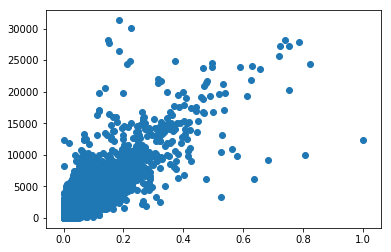

In [75]:
from sklearn.preprocessing import PolynomialFeatures

X_train_1 = X_train[:,3].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [77]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    linear.fit(X_train_poly, y_train)
    train_score_list.append(linear.score(X_train_poly, y_train))
    test_score_list.append(linear.score(X_test_poly, y_test))

In [78]:
print(train_score_list)
print(test_score_list)

[0.9437237945634788, 0.9673125793226711]
[0.9141299359336464, 0.11077737009810229]


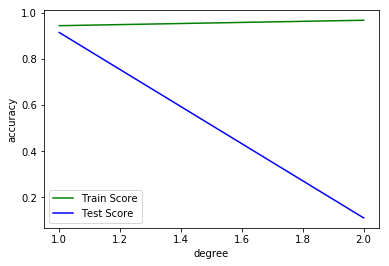

In [79]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [80]:
poly = PolynomialFeatures(1) #We use degree 1 as it gives us the best score.
X_train_poly = poly.fit_transform(X_train_1)

linear.fit(X_train_poly, y_train)
linear.score(X_train_poly, y_train)

0.7878692869568654

## Our best model comes out to be Linear Regression, with an r² value of 0.93

## Buzz Prediction using Linear Regression

In [9]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [10]:
MinMax = MinMaxScaler()
X_train = MinMax.fit_transform(X_train_unscaled)
X_test = MinMax.transform(X_test_unscaled)

In [11]:
from sklearn import linear_model

In [14]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
array.reshape(-1, 1)
predictions = lm.predict(y_test)

NameError: name 'array' is not defined

### We now predict the value of Buzz using predictions.

In [94]:
predictions

array([ -7.08132402,  21.69424269,  19.9017236 , ..., 853.47554246,
        10.40738276,  38.88069286])

Text(0, 0.5, 'Predictions')

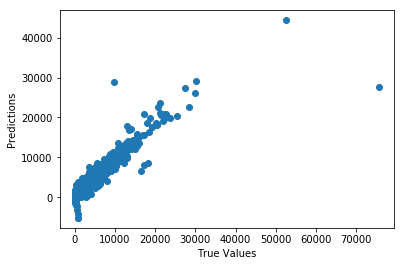

In [87]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [95]:
model.score(X_test, y_test)

0.9141299359336496